In [ ]:
import cv2
import matplotlib.pyplot as plt

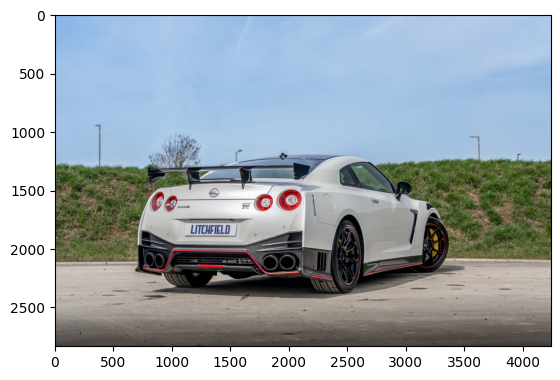

In [ ]:
import_img = cv2.imread('test.jpg')
img = cv2.cvtColor(import_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

36023040
14112


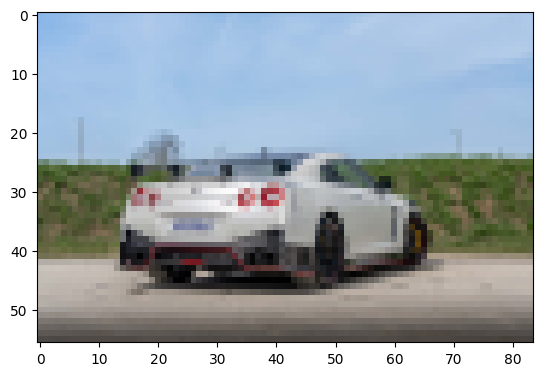

In [ ]:
width = img.shape[1] // 50
height = img.shape[0] // 50


new_size = (width, height)
resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

plt.imshow(resized_img)
print(img.size)
print(resized_img.size)


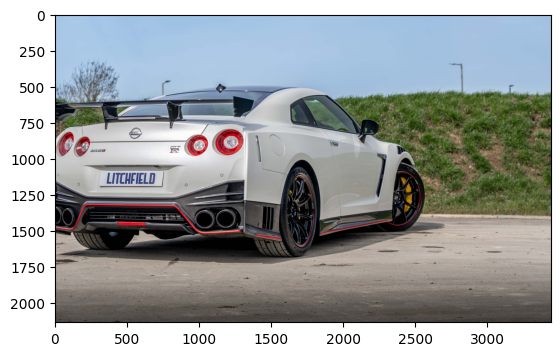

In [ ]:
cropped_img = img[700:, 800:]

plt.imshow(cropped_img)

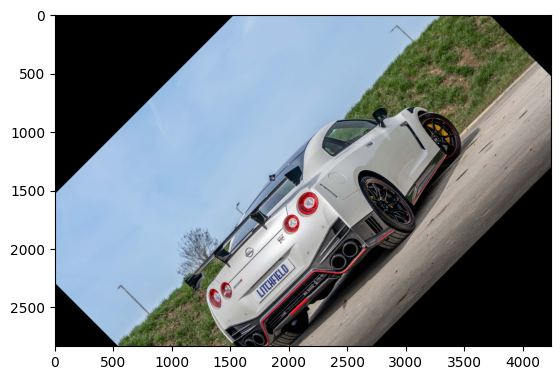

In [ ]:
(h, w) = img.shape[:2]
center = (w//2, h//2)
rotation = cv2.getRotationMatrix2D(center, 45, 1)
rotated_img = cv2.warpAffine(img, rotation, (w, h))
plt.imshow(rotated_img)

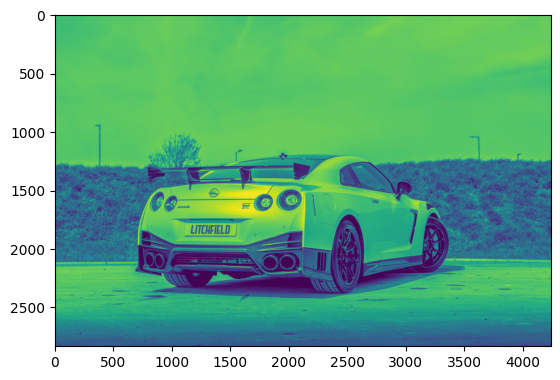

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)

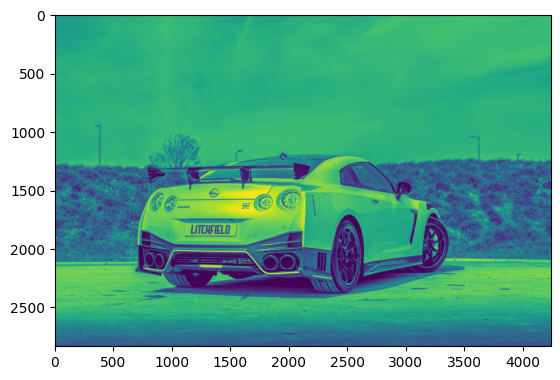

In [ ]:
r, g, b = cv2.split(img)
plt.imshow(r)

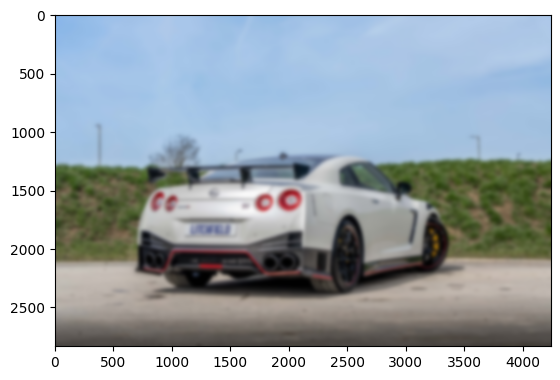

In [ ]:
blurred_img = cv2.GaussianBlur(img, (101, 101), 0)
plt.imshow(blurred_img)

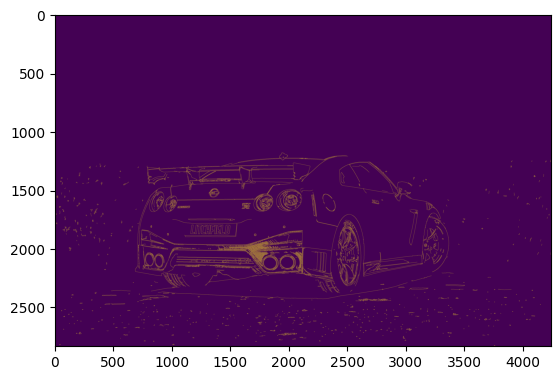

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 300)
plt.imshow(edges)

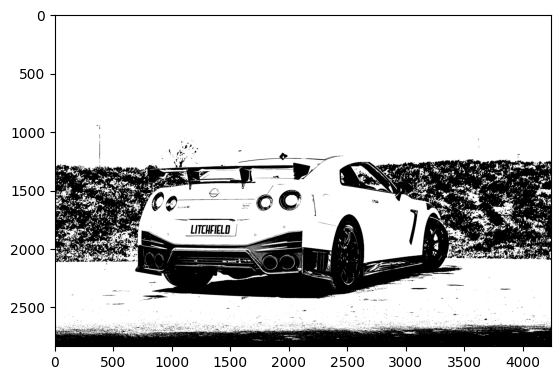

In [ ]:
rect, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap = 'gray')

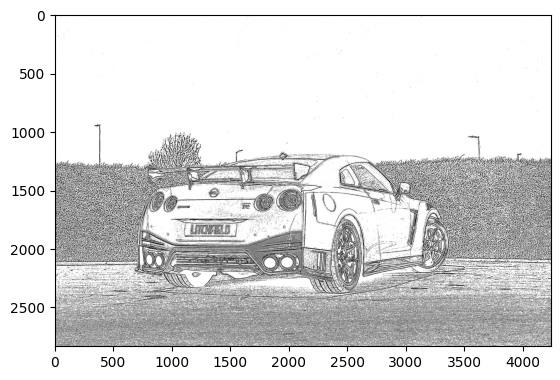

In [ ]:
adaptive = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive, cmap='gray')

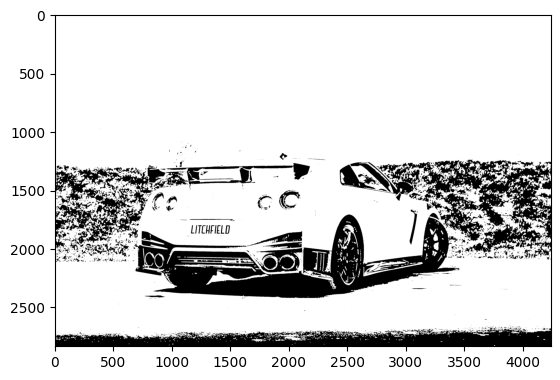

In [ ]:
import numpy as np
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(binary, kernel, iterations=1)
plt.imshow(dilated, cmap='gray')

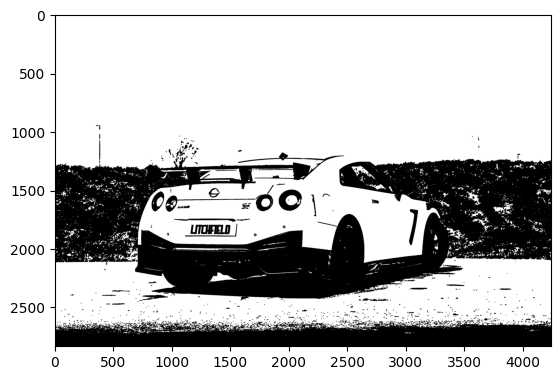

In [ ]:
eroded = cv2.erode(binary, kernel, iterations=1)

plt.imshow(eroded, cmap='gray')

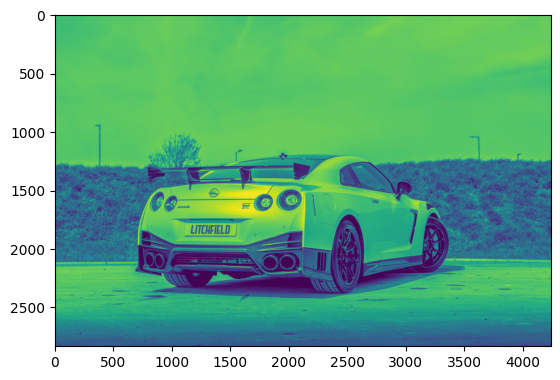

In [ ]:
gray = cv2.cvtColor(import_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

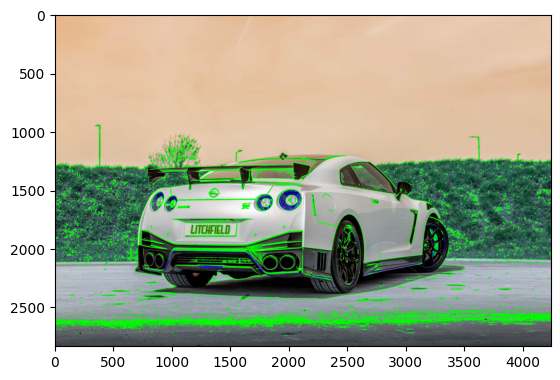

In [ ]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_contours = img.copy()

cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))

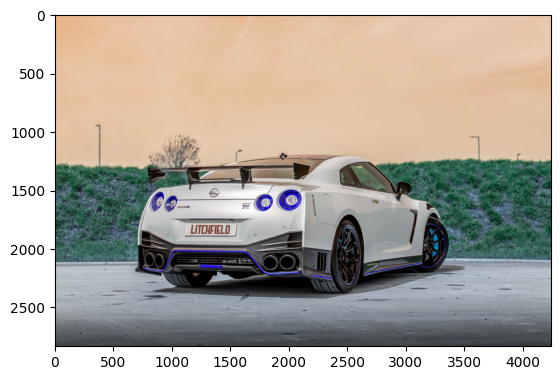

In [ ]:
cnt = contours[0]

epsilon = 0.05 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

img_approx = img.copy()
cv2.drawContours(img_approx, [approx], -1, (255, 0, 0), 3)

plt.imshow(cv2.cvtColor(img_approx, cv2.COLOR_BGR2RGB))

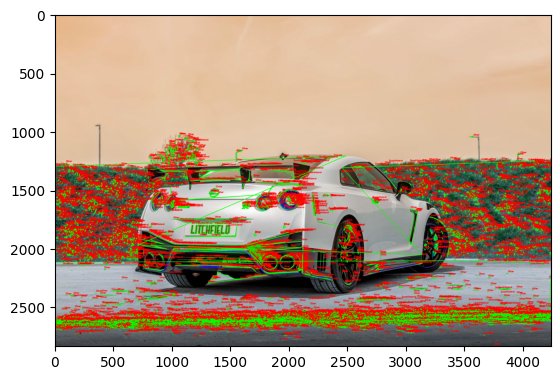

In [ ]:
for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        shape = "Quadrilateral"
    elif len(approx) > 10:
        shape = "Circle"
    else:
        shape = "Other"
    
    cv2.drawContours(img, [approx], -1, (0, 255, 0), 3)
    x, y = approx[0][0]
    cv2.putText(img, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

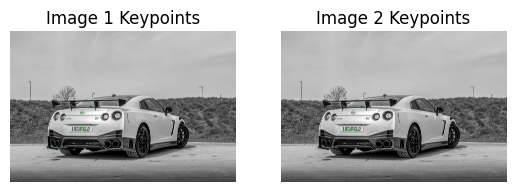

In [ ]:

img1 = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

img1_kp = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0))
img2_kp = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0))

plt.subplot(1, 2, 1)
plt.imshow(img1_kp, cmap='gray')
plt.title('Image 1 Keypoints')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_kp, cmap='gray')
plt.title('Image 2 Keypoints')
plt.axis('off')

plt.show()

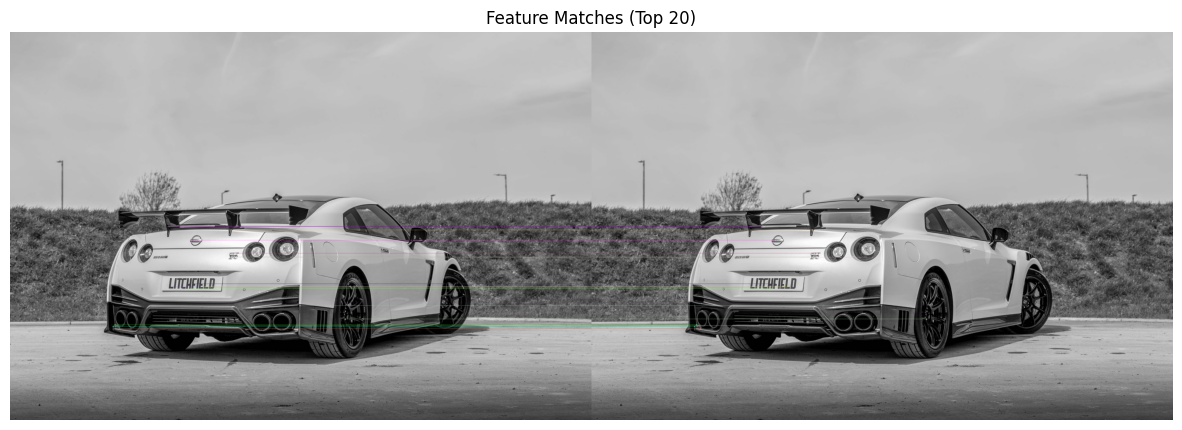

In [ ]:

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)

plt.figure(figsize=(15, 7))
plt.imshow(img_matches)
plt.title('Feature Matches (Top 20)')
plt.axis('off')
plt.show()
